# Extract and hendale data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
topics_over_time =pd.read_pickle("/content/drive/MyDrive/פרויקט סיימנר פרויקט/מאגר המידע/topic_over_time/topics_over_time.pkl")
#topics_over_time =pd.read_pickle("/content/drive/MyDrive/פרויקט סיימנר פרויקט/מאגר המידע/topic_over_time/topics_over_time_april.pkl")

In [ ]:
from datetime import datetime
sorted_topics = topics_over_time.sort_values(by=['Topic'])
sorted_topics = sorted_topics[sorted_topics['Topic'] > -1]
sorted_topics['date'] = sorted_topics['Timestamp'].apply(lambda x: datetime.strptime(str(x).split()[0], '%Y-%m-%d').date())
#sorted_topics['date'] = sorted_topics['Timestamp'].apply(lambda x: str(x).split()[0])
#sorted_topics = sorted_topics[sorted_topics['date'].apply(lambda x: int(str(x).split("-")[2]) >= 16)]
sorted_topics

Topic                                              Words  Frequency  \
245      0  מדינה יהודית, הר הבית, העם היהודי, להר הבית, ב...        136   
440      0  להר הבית, העם היהודי, לרצוח יהודים, הר הבית, ב...        287   
49       0  העם היהודי, מדינת היהודים, 61 לפיזור, לפיזור ה...        154   
391      0  להר הבית, העם היהודי, בהר הבית, לרצוח יהודים, ...        294   
98       0  לבית הכנסת, העם היהודי, להכניס לבית, להכניס לב...        190   
..     ...                                                ...        ...   
389     47  כי יוסף עשה, יוסף עשה בעיות, עשה בעיות והדליף,...          1   
438     47  קבר יוסף, בקבר יוסף, הקבר הזה לא, המנדט הבריטי...          5   
487     47  בישוב ברוכין, אלוף והפך משימת, קרה ולמה אלמ, א...          2   
194     47  קבר יוסף, מחט שומרון, בקבר יוסף, רועי צוויג, ל...         97   
680     47  הזאת מפלצת, תלך ותגדל, הטרור בשכם תלך, נהוגה ש...          1   

                  Timestamp        date  
245 2022-04-14 14:59:54.000  2022-04-14  
440 2022-04-17 14:59:53.200  2022-04-17  
49  2022-04-11 14:59:54.800  2022-04-11  
391 2022-04-16 20:59:53.400  2022-04-16  
98  2022-04-12 08:59:54.600  2022-04-12  
..                      ...         ...  
389 2022-04-16 02:59:53.600  2022-04-16  
438 2022-04-16 20:59:53.400  2022-04-16  
487 2022-04-17 14:59:53.200  2022-04-17  
194 2022-04-13 02:59:54.400  2022-04-13  
680 2022-04-25 02:59:51.200  2022-04-25  

[667 rows x 5 columns]

In [ ]:
topics = topics_over_time['Topic'].unique()
topics = topics[1:]
topics

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 45])

In [ ]:
topic_sum = sorted_topics.groupby(['Topic','date'])['Frequency'].sum().reset_index(name='Frequency')
topic_sum[topic_sum['Topic'] == 10]

Topic        date  Frequency
120     10  2022-04-10         75
121     10  2022-04-11         62
122     10  2022-04-12         60
123     10  2022-04-13        119
124     10  2022-04-14         35
125     10  2022-04-15         30
126     10  2022-04-16        106
127     10  2022-04-17         80
128     10  2022-04-18         71
129     10  2022-04-23         25
130     10  2022-04-24         34
131     10  2022-04-25         56

# Old trend detection

In [ ]:
def get_trendy(df):
  mean = df['Frequency'].mean() * 2.2
  df = df.tail(3)
  one_day = False
  freq = df['Frequency'].head(1).values[0]
  df = df.tail(2)
  max = df['Frequency'].max()
  if max < mean:
    return False
  for ind in df.index:
      if (int(df['Frequency'][ind]))/freq > (4/3):
        one_day = True
        #freq = int(df['Frequency'][ind])
      else:
        return False
  return one_day


In [ ]:
def get_all_trendy_topics(df)->list():
  trendy_topics = []
  for t in topics :
    df_for_topic_t = df[df['Topic'] == t]
    df_for_topic_t = df_for_topic_t.sort_values(by=['date'])
    if get_trendy(df_for_topic_t) == True:
     trendy_topics.append(t)
  return trendy_topics

res = get_all_trendy_topics(topic_sum)
res

[4, 9, 20, 21, 22, 32, 34, 35, 43]

### Trend 2 - מערכת המשפט/גיא בוסי

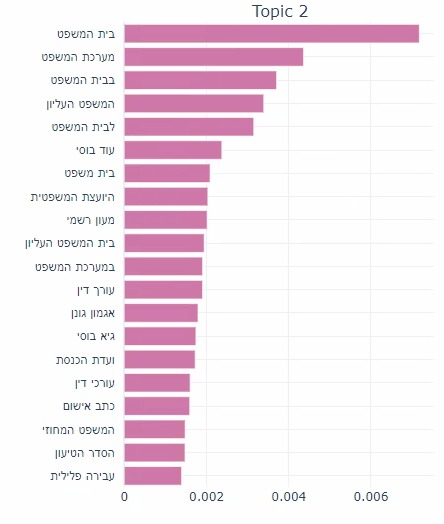

In [ ]:
import IPython
from IPython.display import Image
Image(open('/content/drive/MyDrive/פרויקט סיימנר פרויקט/trend detection pic/plot_bar_2.jpeg','rb').read())

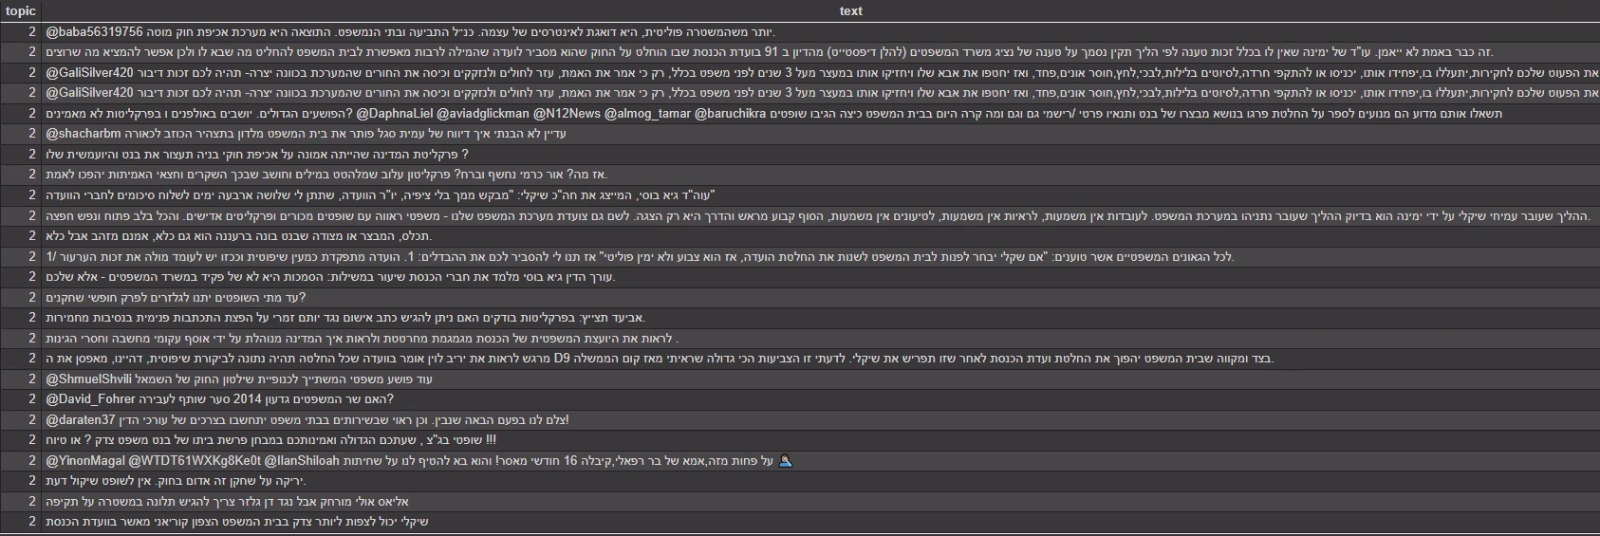

In [ ]:
Image(open('/content/drive/MyDrive/פרויקט סיימנר פרויקט/trend detection pic/txt_2.jpeg','rb').read())

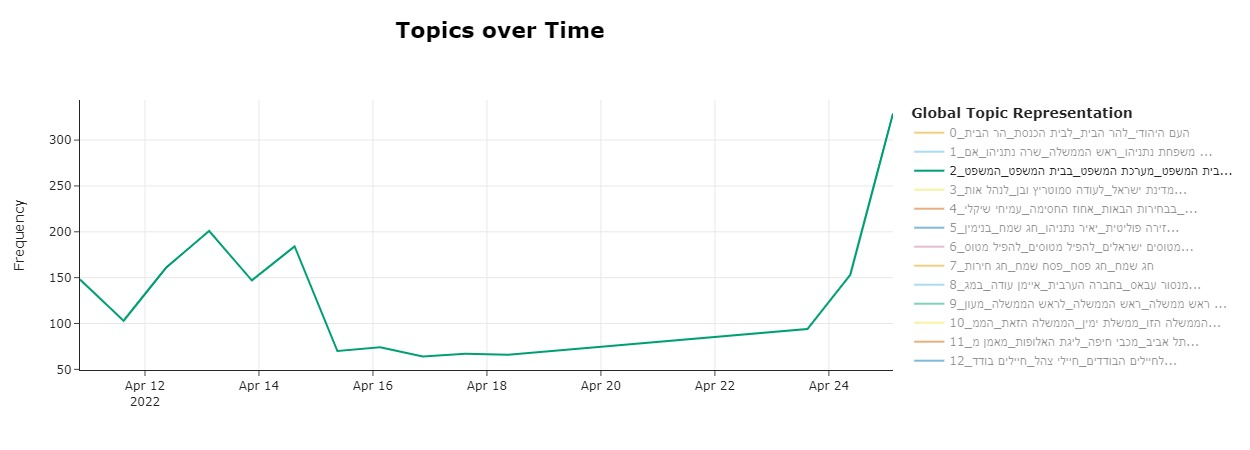

In [ ]:
Image(open('/content/drive/MyDrive/פרויקט סיימנר פרויקט/trend detection pic/topic_over_time2.jpeg','rb').read())

In [ ]:
topic_2 = topic_sum[topic_sum['Topic'] == 2]
topic_2 = topic_2.sort_values(by=['date'])
topic_2

Topic        date  Frequency
24      2  2022-04-10        148
25      2  2022-04-11        103
26      2  2022-04-12        161
27      2  2022-04-13        348
28      2  2022-04-14        184
29      2  2022-04-15         70
30      2  2022-04-16        138
31      2  2022-04-17         67
32      2  2022-04-18         66
33      2  2022-04-23         94
34      2  2022-04-24        153
35      2  2022-04-25        329

In [ ]:
topic_2 = sorted_topics[sorted_topics['Topic'] == 2]
topic_2 = topic_2.sort_values(by=['Timestamp'])
topic_2

Topic                                              Words  Frequency  \
3        2  בית המשפט, דינו מאסר, המשפט העליון, לחוק העונש...        148   
51       2  בית המשפט, מערכת המשפט, צווי איסור הפרסום, הסד...        103   
100      2  בית המשפט, אגמון גונן, הסדר הטיעון, בתיק 4000,...        161   
149      2  בית המשפט, המשפט העליון, כתב האישום, השופט סול...        201   
198      2  בית המשפט, מעון רשמי, בבית המשפט, מערכת המשפט,...        147   
247      2  בית המשפט, מערכת המשפט, פרקליטות המדינה, לבית ...        184   
296      2  בית המשפט, חנינה כל עבריין, שהבדיחה על, ועדת ה...         70   
345      2  מערכת המשפט, שיש חוקי המדינה, שיש חוקי, חוקי ה...         74   
393      2  במערכת המשפט, בבית המשפט, השמאל הקיצוני, כוח כ...         64   
442      2  טימור הורחק, בר טימור הורחק, בר טימור, מערכת ה...         67   
491      2  עוד אוריאל, בבית המשפט, עוד אוריאל חור, חור ני...         66   
539      2  מערכת המשפט, היועצת המשפטית, בית המשפט, המשפט ...         94   
588      2  בית המשפט, מערכת המשפט, בבית המשפט, המשפט העלי...        153   
635      2  עוד בוסי, גיא בוסי, בבית המשפט, בית המשפט, יור...        329   

                  Timestamp        date  
3   2022-04-10 20:38:19.004  2022-04-10  
51  2022-04-11 14:59:54.800  2022-04-11  
100 2022-04-12 08:59:54.600  2022-04-12  
149 2022-04-13 02:59:54.400  2022-04-13  
198 2022-04-13 20:59:54.200  2022-04-13  
247 2022-04-14 14:59:54.000  2022-04-14  
296 2022-04-15 08:59:53.800  2022-04-15  
345 2022-04-16 02:59:53.600  2022-04-16  
393 2022-04-16 20:59:53.400  2022-04-16  
442 2022-04-17 14:59:53.200  2022-04-17  
491 2022-04-18 08:59:53.000  2022-04-18  
539 2022-04-23 14:59:51.600  2022-04-23  
588 2022-04-24 08:59:51.400  2022-04-24  
635 2022-04-25 02:59:51.200  2022-04-25

### Trend 4 - מערכת הבחירות

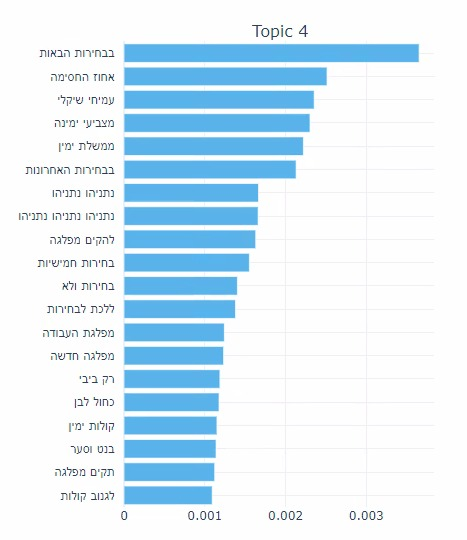

In [ ]:
Image(open('/content/drive/MyDrive/פרויקט סיימנר פרויקט/trend detection pic/plot_bar_4.jpeg','rb').read())

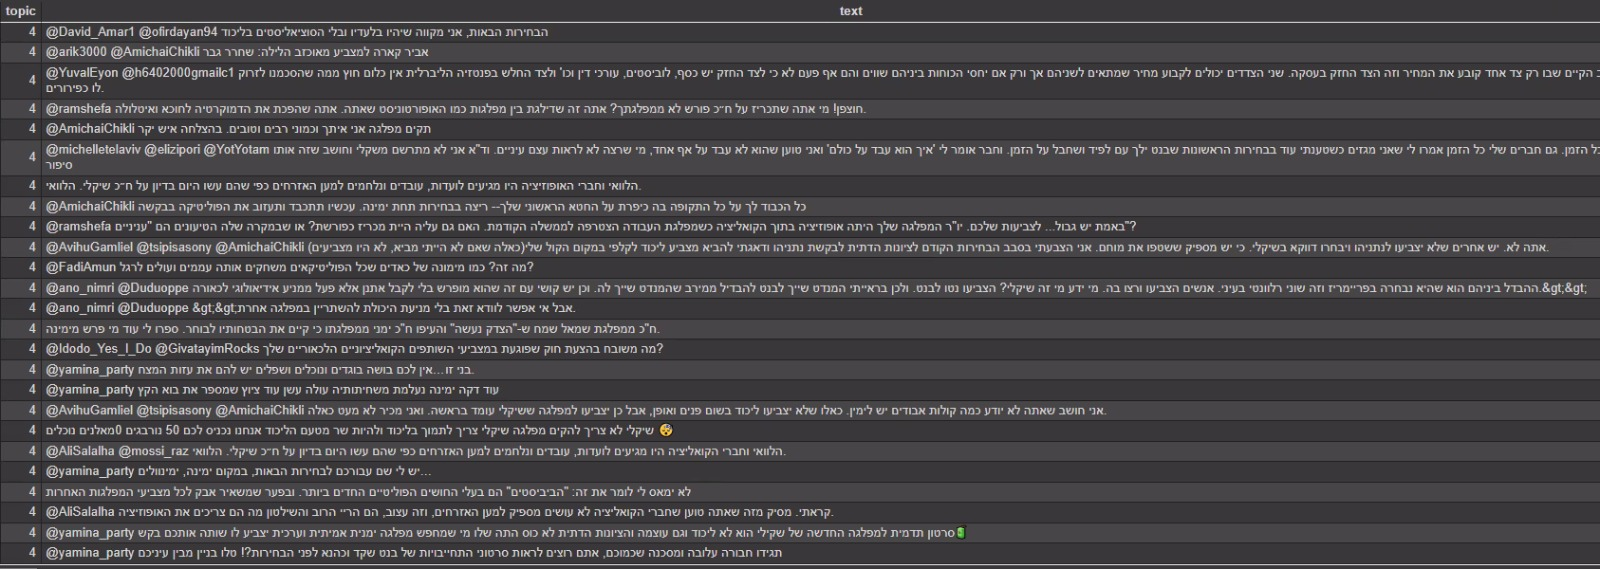

In [ ]:
Image(open('/content/drive/MyDrive/פרויקט סיימנר פרויקט/trend detection pic/txt_4.jpeg','rb').read())

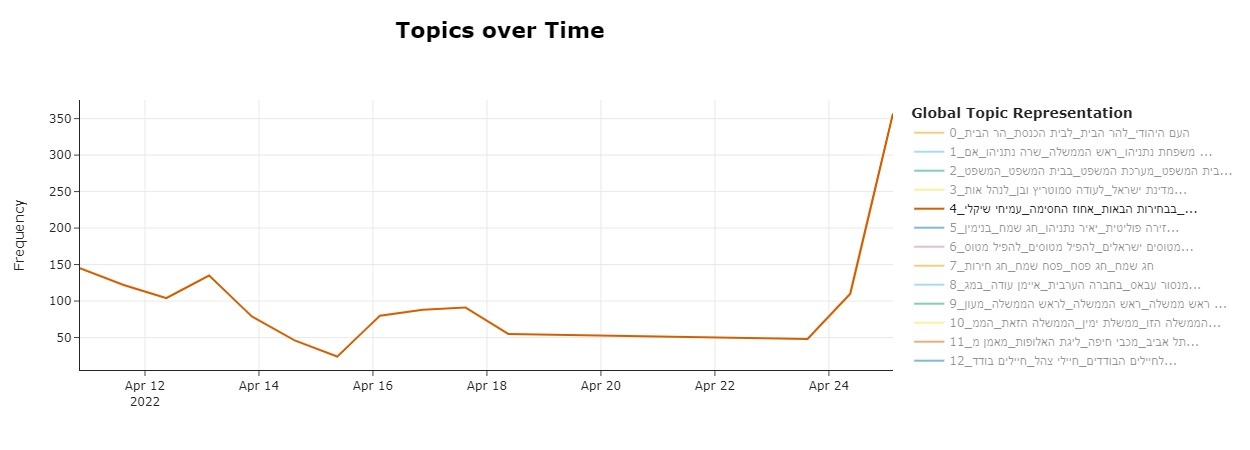

In [ ]:
Image(open('/content/drive/MyDrive/פרויקט סיימנר פרויקט/trend detection pic/topic_over_time4.jpeg','rb').read())

In [ ]:
topic_4 = topic_sum[topic_sum['Topic'] == 4]
topic_4 = topic_4.sort_values(by=['date'])
topic_4

Topic        date  Frequency
48      4  2022-04-10        145
49      4  2022-04-11        122
50      4  2022-04-12        104
51      4  2022-04-13        214
52      4  2022-04-14         46
53      4  2022-04-15         24
54      4  2022-04-16        168
55      4  2022-04-17         91
56      4  2022-04-18         55
57      4  2022-04-23         48
58      4  2022-04-24        110
59      4  2022-04-25        357

In [ ]:
topic_4 = sorted_topics[sorted_topics['Topic'] == 4]
topic_4 = topic_4.sort_values(by=['Timestamp'])
topic_4

Topic                                              Words  Frequency  \
5        4  בחירות ולא, ללכת לבחירות, איימן עודה, התנועה ע...        145   
53       4  בבחירות הבאות, זו ההגדרה, מהי דמוקרטיה, אתה רו...        122   
102      4  עמדת ימינה, במערכת בחירות, שמוליק סילמן, אחד ג...        104   
151      4  מצביעי ימינה, בחירות חמישיות, מחפשים שיח, רוב ...        135   
200      4  אחוז החסימה, עברה אחוז החסימה, קל כי, שכל אדם ...         79   
249      4  רואה זה קורה, זה קורה, רואה זה, מפגן שרירים, ב...         46   
298      4  מאחל אחדות, יצירתי אחרי, נפתלי יצירתי, נפתלי י...         24   
347      4  רק ביבי, בבחירות הבאות, ממשלת ימין, בנט וסער, ...         80   
395      4  ממשלת ימין, איאפשר להקים ממשלת, אנשי שמאל שהתח...         88   
444      4  בבחירות הבאות, לרוץ במפלגה, ממשלת ימין, שהתופע...         91   
493      4  ועובדת במגזר, שלא הביעו תמיכה, ימין חברתי, מצב...         55   
541      4  מפלגת מרצ, בבחירות הבאות, איילת שקד, ארי הרו, ...         48   
590      4  בעד חוקים, עמיחי שיקלי, בעד חוקים ימנים, חוקים...        110   
637      4  נתניהו נתניהו, נתניהו נתניהו נתניהו, בבחירות ה...        357   

                  Timestamp        date  
5   2022-04-10 20:38:19.004  2022-04-10  
53  2022-04-11 14:59:54.800  2022-04-11  
102 2022-04-12 08:59:54.600  2022-04-12  
151 2022-04-13 02:59:54.400  2022-04-13  
200 2022-04-13 20:59:54.200  2022-04-13  
249 2022-04-14 14:59:54.000  2022-04-14  
298 2022-04-15 08:59:53.800  2022-04-15  
347 2022-04-16 02:59:53.600  2022-04-16  
395 2022-04-16 20:59:53.400  2022-04-16  
444 2022-04-17 14:59:53.200  2022-04-17  
493 2022-04-18 08:59:53.000  2022-04-18  
541 2022-04-23 14:59:51.600  2022-04-23  
590 2022-04-24 08:59:51.400  2022-04-24  
637 2022-04-25 02:59:51.200  2022-04-25

### Trend 20 - איילון מאסק

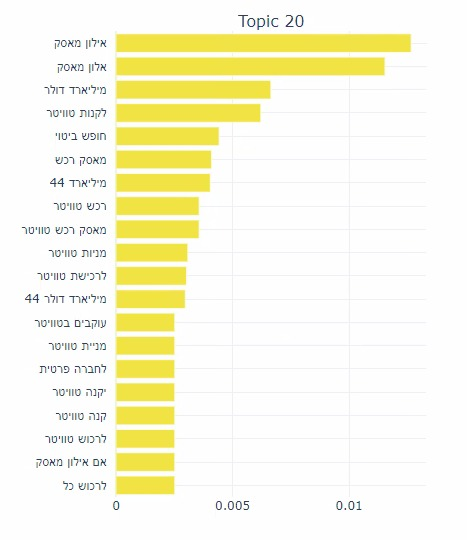

In [ ]:
Image(open('/content/drive/MyDrive/פרויקט סיימנר פרויקט/trend detection pic/plot_bar_20.jpeg','rb').read())

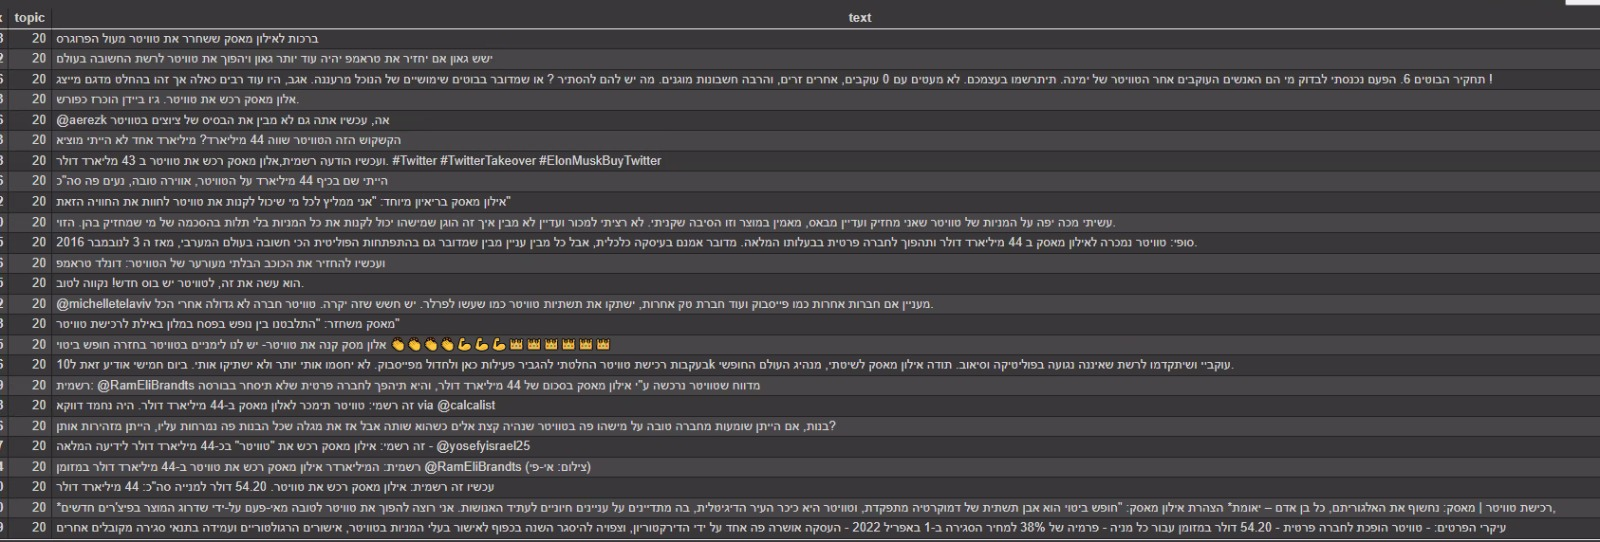

In [ ]:
Image(open('/content/drive/MyDrive/פרויקט סיימנר פרויקט/trend detection pic/txt_20.jpeg','rb').read())

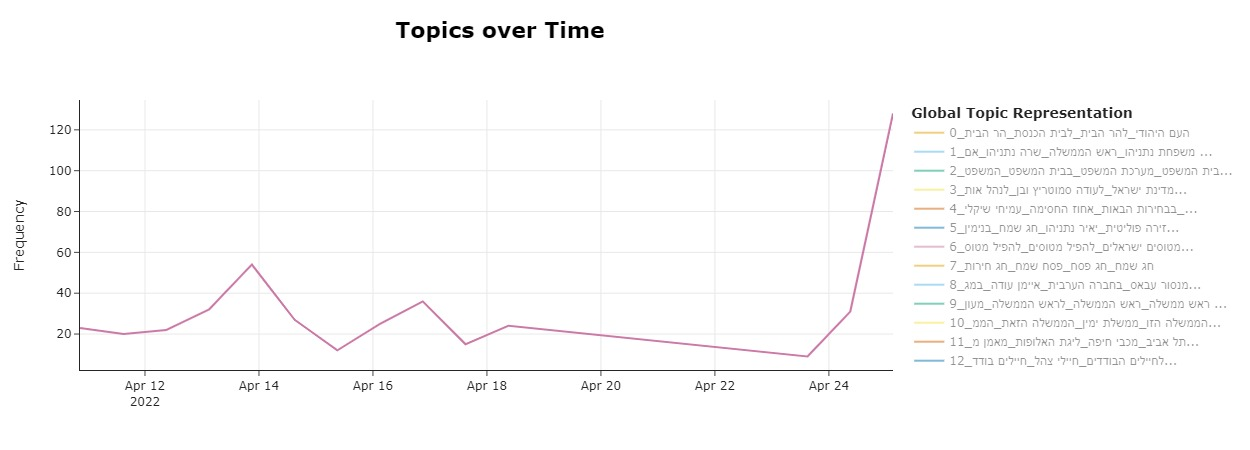

In [ ]:
Image(open('/content/drive/MyDrive/פרויקט סיימנר פרויקט/trend detection pic/topic_over_time20.jpeg','rb').read())

In [ ]:
topic_20 = topic_sum[topic_sum['Topic'] == 20]
topic_20 = topic_20.sort_values(by=['date'])
topic_20

Topic        date  Frequency
240     20  2022-04-10         23
241     20  2022-04-11         20
242     20  2022-04-12         22
243     20  2022-04-13         86
244     20  2022-04-14         27
245     20  2022-04-15         12
246     20  2022-04-16         61
247     20  2022-04-17         15
248     20  2022-04-18         24
249     20  2022-04-23          9
250     20  2022-04-24         31
251     20  2022-04-25        128

In [ ]:
topic_20 = sorted_topics[sorted_topics['Topic'] == 20]
topic_20 = topic_20.sort_values(by=['Timestamp'])
topic_20

Topic                                              Words  Frequency  \
21      20  הטוויטר כת, לחלום שעל, שאני לסבול בכל, מבין וש...         23   
69      20  בתמיכה וניהול, וניהול מתנדבות, הפייק יוזר, בתמ...         20   
118     20  לנהל עמוד, לנהל עמוד הטוויטר, עמוד הטוויטר, זה...         22   
167     20  פנויים פנויות, גרושות פנויים, גרושות פנויים פנ...         32   
216     20  אלון מאסק, לקנות טוויטר, לרכוש כל, אילון מאסק,...         54   
265     20  אילון מאסק, לקנות טוויטר, לפי שער, יקנה טוויטר...         27   
314     20  כותב פוסטים שמאליים, פרטי ואולי לראות, בשבוע ה...         12   
363     20  לייקים בטוויטר, חברה קטנה, דולר בשנה, תודה תוד...         25   
411     20  האיסור השימוש ברשת, ממשלת אינדונזיה הוציאה, תכ...         36   
460     20  ועל מדרכת המאהל, לייקים וגם אחרי, טובים אחכ, ל...         15   
509     20  אפקט רשת, בטוויטר ולא, ובנוסף העם הנבחר, טרור ...         24   
557     20  מתחילה את עוברת, ושם הקודים, שאת מתחילה את, לך...          9   
606     20  אילון מאסק, בפייסבוק אני ביבי, בפייסבוק אני, א...         31   
653     20  אילון מאסק, אלון מאסק, מיליארד דולר, מאסק רכש,...        128   

                  Timestamp        date  
21  2022-04-10 20:38:19.004  2022-04-10  
69  2022-04-11 14:59:54.800  2022-04-11  
118 2022-04-12 08:59:54.600  2022-04-12  
167 2022-04-13 02:59:54.400  2022-04-13  
216 2022-04-13 20:59:54.200  2022-04-13  
265 2022-04-14 14:59:54.000  2022-04-14  
314 2022-04-15 08:59:53.800  2022-04-15  
363 2022-04-16 02:59:53.600  2022-04-16  
411 2022-04-16 20:59:53.400  2022-04-16  
460 2022-04-17 14:59:53.200  2022-04-17  
509 2022-04-18 08:59:53.000  2022-04-18  
557 2022-04-23 14:59:51.600  2022-04-23  
606 2022-04-24 08:59:51.400  2022-04-24  
653 2022-04-25 02:59:51.200  2022-04-25

### Trend 22 - הוצאות ראש הממשלה בנט על ביתו ברעננה

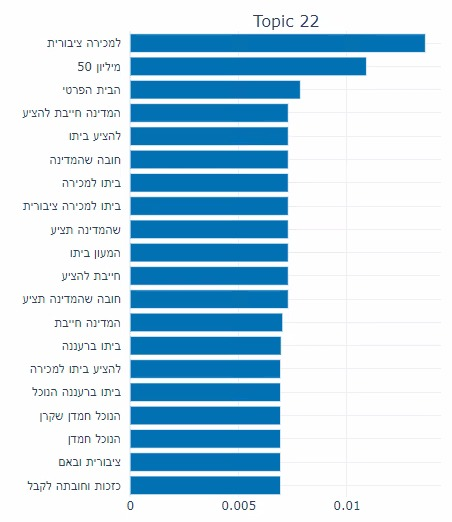

In [ ]:
Image(open('/content/drive/MyDrive/פרויקט סיימנר פרויקט/trend detection pic/plot_bar_22.jpeg','rb').read())

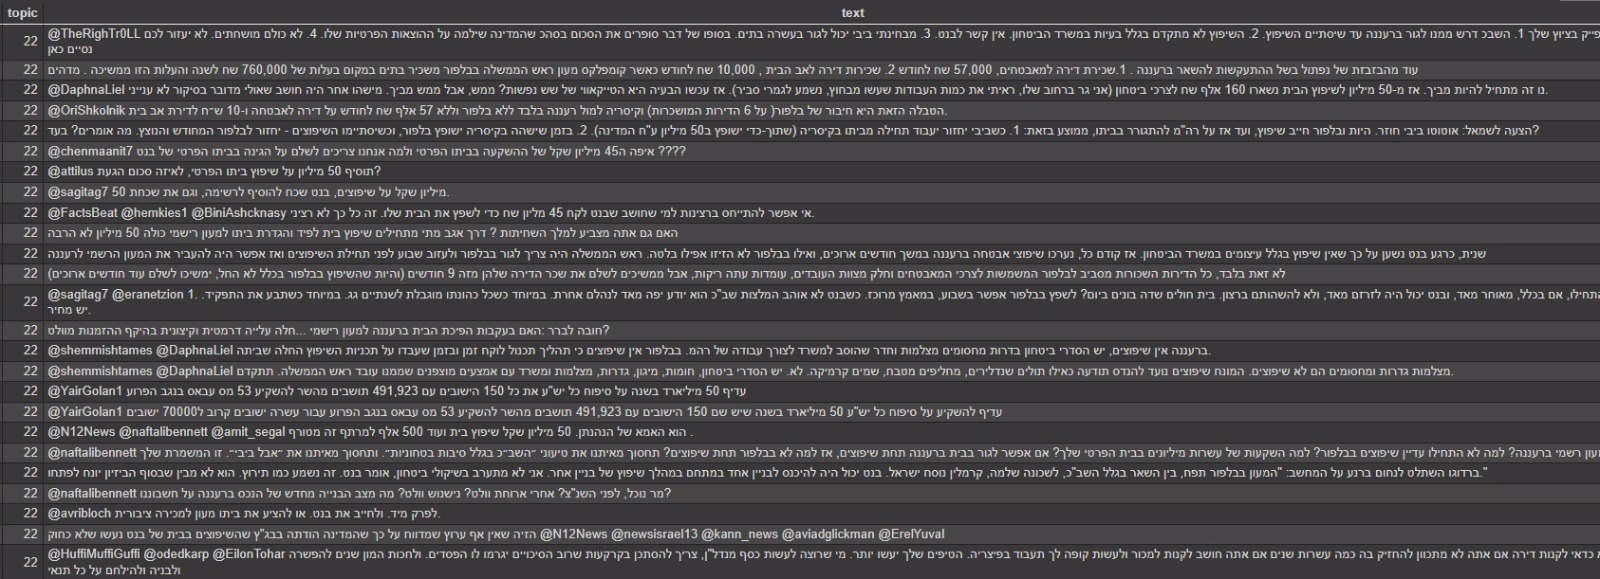

In [ ]:
Image(open('/content/drive/MyDrive/פרויקט סיימנר פרויקט/trend detection pic/txt_22.jpeg','rb').read())

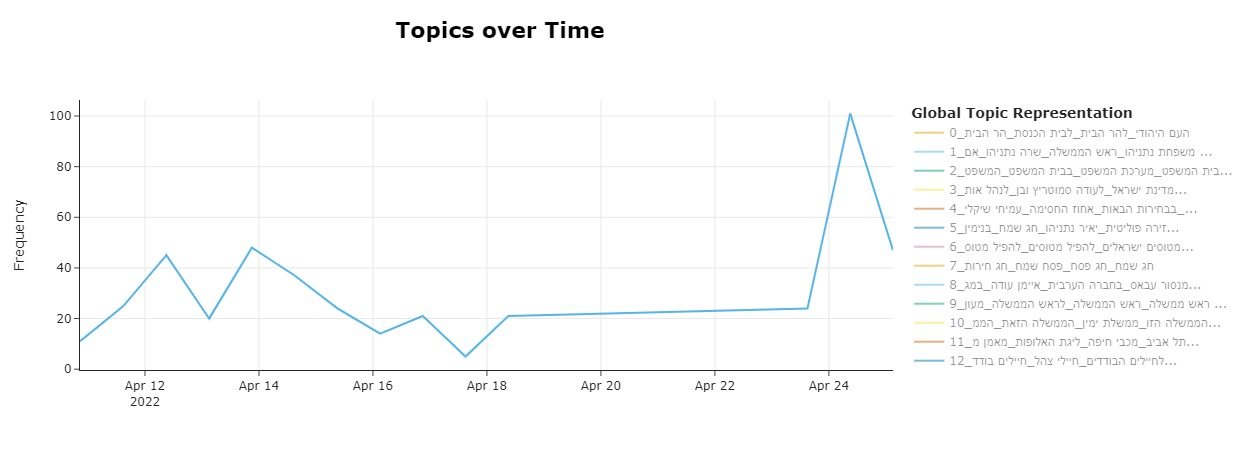

In [ ]:
Image(open('/content/drive/MyDrive/פרויקט סיימנר פרויקט/trend detection pic/topic_over_time22.jpeg','rb').read())

In [ ]:
topic_22 = topic_sum[topic_sum['Topic'] == 22]
topic_22 = topic_22.sort_values(by=['date'])
topic_22

Topic        date  Frequency
264     22  2022-04-10         11
265     22  2022-04-11         25
266     22  2022-04-12         45
267     22  2022-04-13         68
268     22  2022-04-14         37
269     22  2022-04-15         24
270     22  2022-04-16         35
271     22  2022-04-17          5
272     22  2022-04-18         21
273     22  2022-04-23         24
274     22  2022-04-24        101
275     22  2022-04-25         47

In [ ]:
topic_22 = sorted_topics[sorted_topics['Topic'] == 22]
topic_22 = topic_22.sort_values(by=['Timestamp'])
topic_22

Topic                                              Words  Frequency  \
23      22  לדיירים דואגת, הארץ סוגיית, וחברת עמידר שבמקום...         11   
71      22  הבית ברעננה, סידרו חדר, סידרו חדר עבודה, מחירי...         25   
120     22  הבית הפרטי, בר השגה, למעון הרשמי, זכויות בנייה...         45   
169     22  הבית הפרטי, אלף שח, הבן זונה בודק, זונה בודק, ...         20   
218     22  למכירה ציבורית, הוצאות הבניה והשיפוץ, חייבת לה...         48   
267     22  למכירה ציבורית, המעון ביתו, חובה שהמדינה תציע,...         37   
316     22  למכירה ציבורית, מחירי הדירות, הנוכל לחיות, מיל...         24   
365     22  בשוק לטובת, 50 מיליון, חדרי שירותים, מחירי הדי...         14   
413     22  בנייה לשכירות, שוק הדיור, בעלי דירות, 50 מיליו...         21   
462     22  מדד מחירי הדירות, גרתי פעם, תעבור במצב, ציבורי...          5   
511     22  מחירי השוק, בבעלות פרטית, שיפוץ הבית, מחירי הד...         21   
559     22  אלף בחודש, מיליון שח, 50 מיליון, 10 אלף, אלף ש...         24   
608     22  50 מיליון, הבית הפרטי, הבית ברעננה, למכירה ציב...        101   
655     22  50 מיליון, למכירה ציבורית, מיליון שקל, בביתו ה...         47   

                  Timestamp        date  
23  2022-04-10 20:38:19.004  2022-04-10  
71  2022-04-11 14:59:54.800  2022-04-11  
120 2022-04-12 08:59:54.600  2022-04-12  
169 2022-04-13 02:59:54.400  2022-04-13  
218 2022-04-13 20:59:54.200  2022-04-13  
267 2022-04-14 14:59:54.000  2022-04-14  
316 2022-04-15 08:59:53.800  2022-04-15  
365 2022-04-16 02:59:53.600  2022-04-16  
413 2022-04-16 20:59:53.400  2022-04-16  
462 2022-04-17 14:59:53.200  2022-04-17  
511 2022-04-18 08:59:53.000  2022-04-18  
559 2022-04-23 14:59:51.600  2022-04-23  
608 2022-04-24 08:59:51.400  2022-04-24  
655 2022-04-25 02:59:51.200  2022-04-25

### Trend 34 - מתן כהנא טייס קרב לשעבר

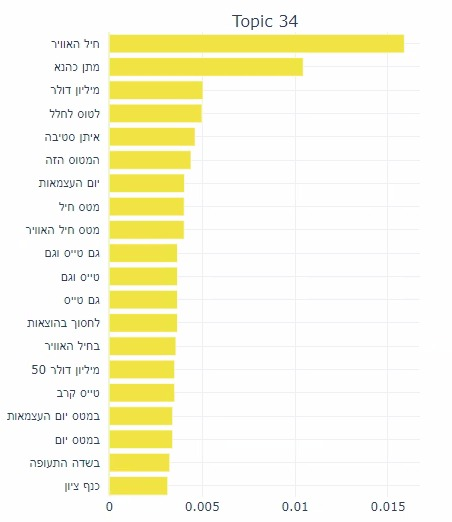

In [ ]:
Image(open('/content/drive/MyDrive/פרויקט סיימנר פרויקט/trend detection pic/plot_bar_34.jpeg','rb').read())

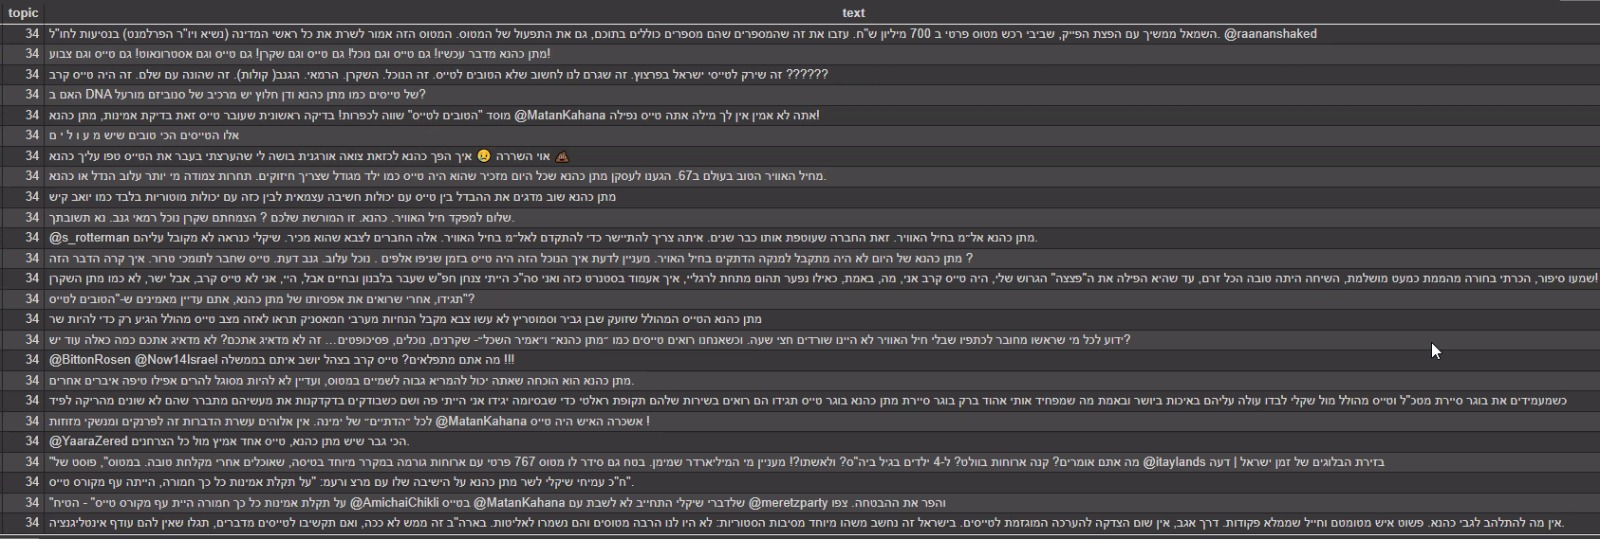

In [ ]:
Image(open('/content/drive/MyDrive/פרויקט סיימנר פרויקט/trend detection pic/txt_34.jpeg','rb').read())

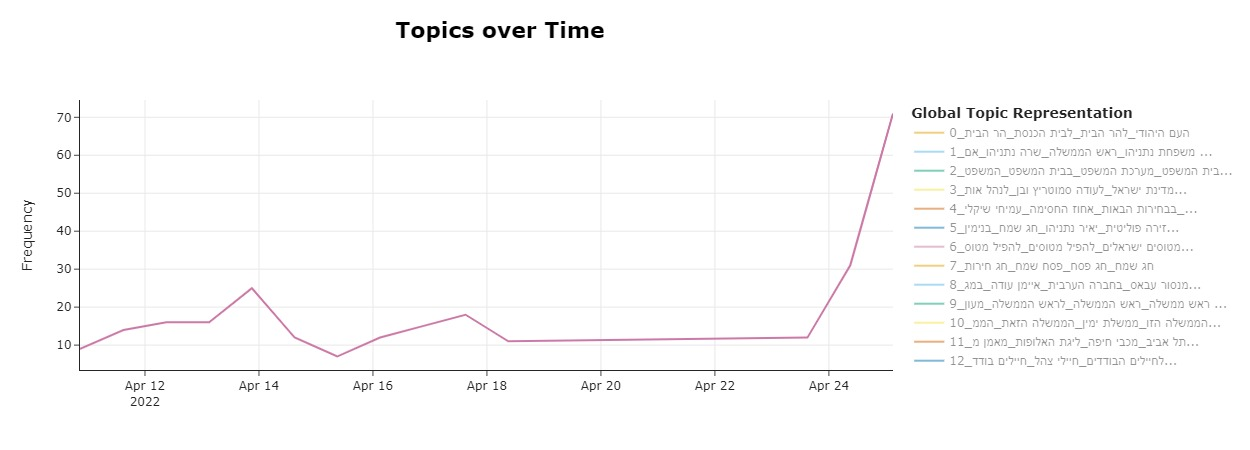

In [ ]:
Image(open('/content/drive/MyDrive/פרויקט סיימנר פרויקט/trend detection pic/topic_over_time34.jpeg','rb').read())

In [ ]:
topic_34 = topic_sum[topic_sum['Topic'] == 34]
topic_34 = topic_34.sort_values(by=['date'])
topic_34

Topic        date  Frequency
408     34  2022-04-10          9
409     34  2022-04-11         14
410     34  2022-04-12         16
411     34  2022-04-13         41
412     34  2022-04-14         12
413     34  2022-04-15          7
414     34  2022-04-16         27
415     34  2022-04-17         18
416     34  2022-04-18         11
417     34  2022-04-23         12
418     34  2022-04-24         31
419     34  2022-04-25         71

In [ ]:
topic_34 = sorted_topics[sorted_topics['Topic'] == 34]
topic_34 = topic_34.sort_values(by=['Timestamp'])
topic_34

Topic                                              Words  Frequency  \
35      34  לשם כבוד, נראה שחללית, טייס לשם, כבוד ותהילה ל...          9   
83      34  ב55 מיליון, לטוס לחלל, שלהם מעדיף, באימירטס יה...         14   
132     34  על ניסה להמריא, להמריא פעמיים ולא, על ניסה, לח...         16   
181     34  צריכות להתעסק בזה, ממשלות צריכות להתעסק, סוציא...         16   
230     34  לחסוך בהוצאות, מנכל נתבג שמואל, נתבג שמואל זכא...         25   
279     34  לא מבין, אלפים שיעידו, הילדים הבא בתור, משתמשי...         12   
328     34  מקהיר ברור, בנתבג בטיסה ישירה, שתאחסן ולבנות, ...          7   
377     34  חיל האוויר, במילה אחת טרולי, יטוסו ואם, שישן כ...         12   
425     34  חיל האוויר, עוד גדול, אלף איש, משהו שתלך דרכו,...         15   
474     34  במטס יום העצמאות, במטס יום, האמירויות ישתתפו ב...         18   
523     34  האווירי לטיסות, המרחב האווירי, לאירופה ואמריקה...         11   
571     34  חיל האוויר, עיר האבות חברון, האבות חברון, עיר ...         12   
620     34  חיל האוויר, מתן כהנא, יום העצמאות, להודיע נחרצ...         31   
667     34  מתן כהנא, חיל האוויר, טייס וגם, גם טייס וגם, ג...         71   

                  Timestamp        date  
35  2022-04-10 20:38:19.004  2022-04-10  
83  2022-04-11 14:59:54.800  2022-04-11  
132 2022-04-12 08:59:54.600  2022-04-12  
181 2022-04-13 02:59:54.400  2022-04-13  
230 2022-04-13 20:59:54.200  2022-04-13  
279 2022-04-14 14:59:54.000  2022-04-14  
328 2022-04-15 08:59:53.800  2022-04-15  
377 2022-04-16 02:59:53.600  2022-04-16  
425 2022-04-16 20:59:53.400  2022-04-16  
474 2022-04-17 14:59:53.200  2022-04-17  
523 2022-04-18 08:59:53.000  2022-04-18  
571 2022-04-23 14:59:51.600  2022-04-23  
620 2022-04-24 08:59:51.400  2022-04-24  
667 2022-04-25 02:59:51.200  2022-04-25

# New trend detectin

### Moving average graph

In [ ]:
topic_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Topic      572 non-null    int64 
 1   date       572 non-null    object
 2   Frequency  572 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.5+ KB


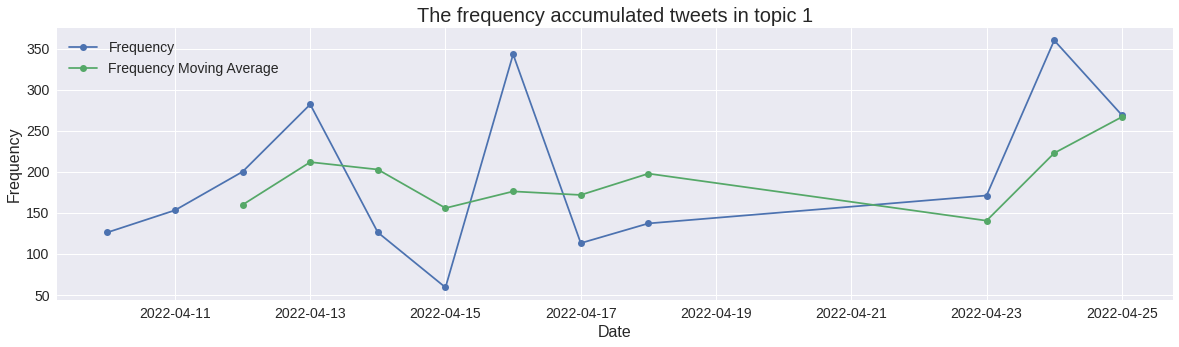

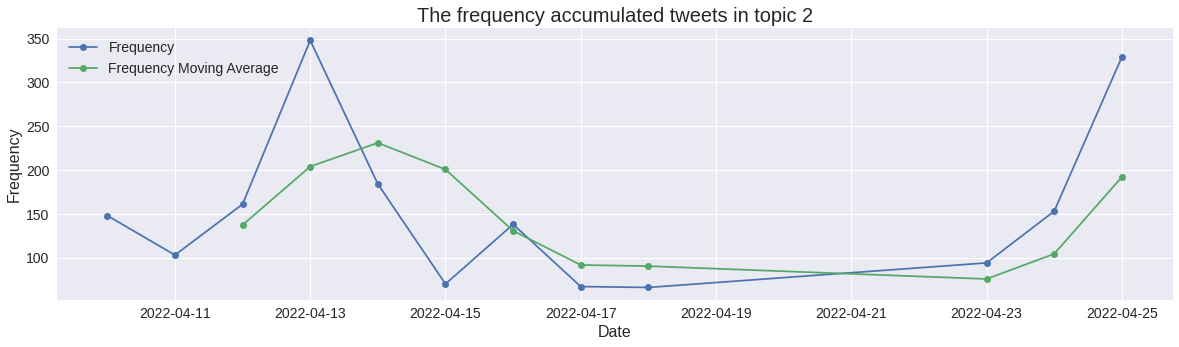

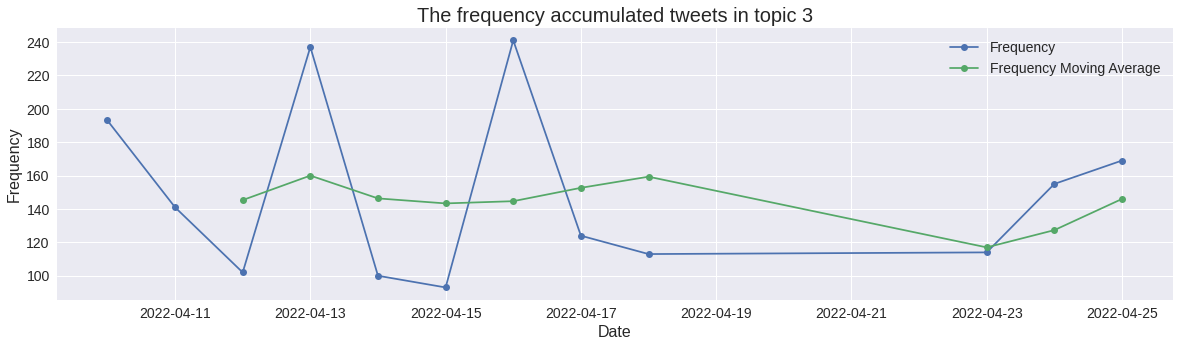

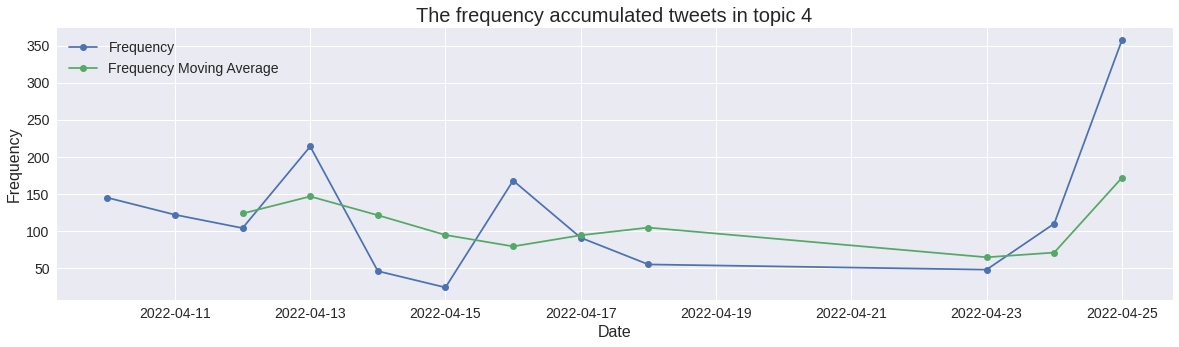

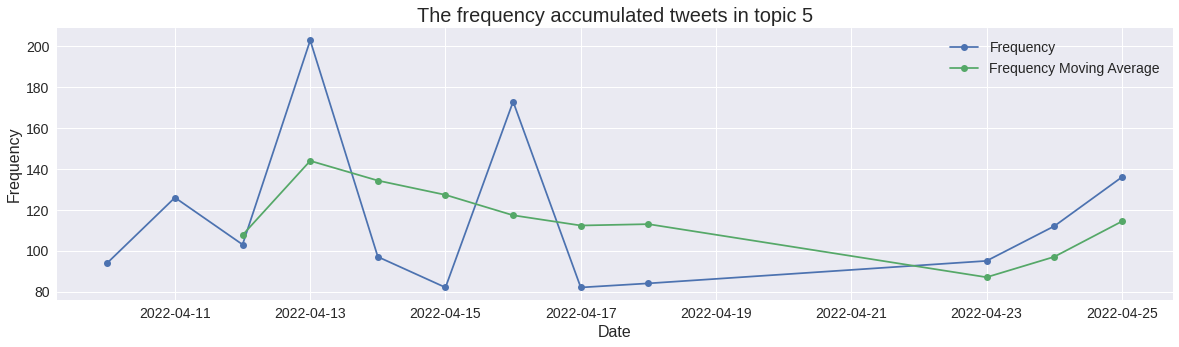

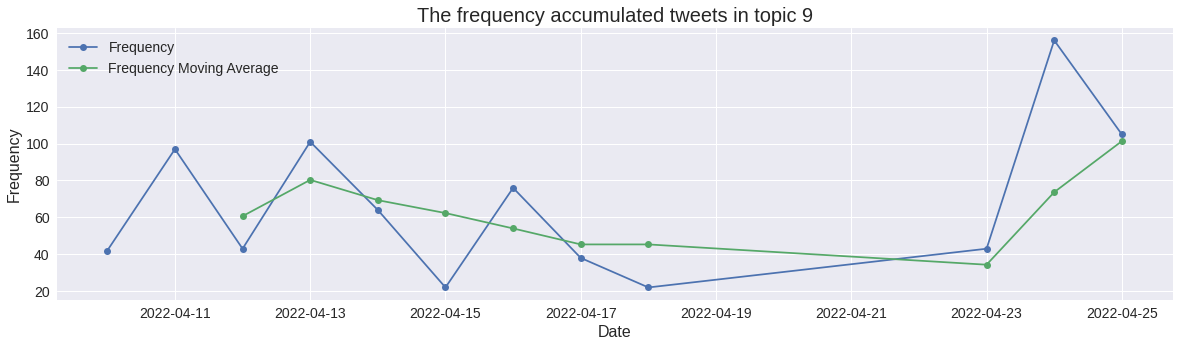

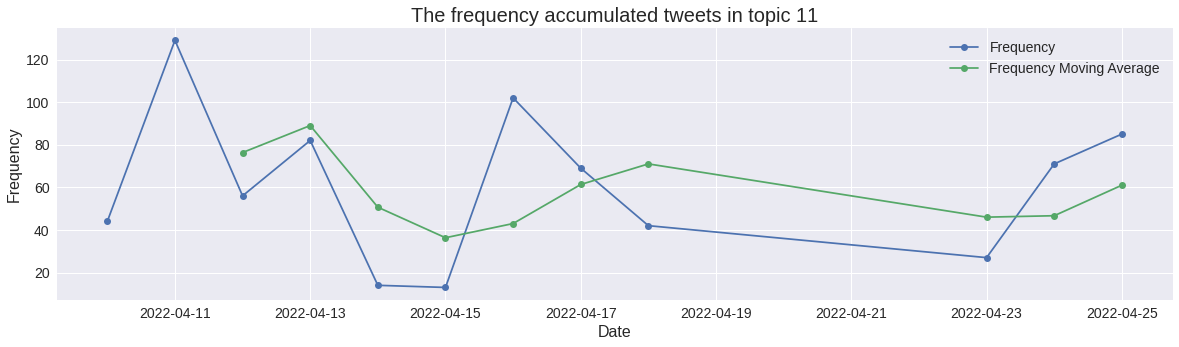

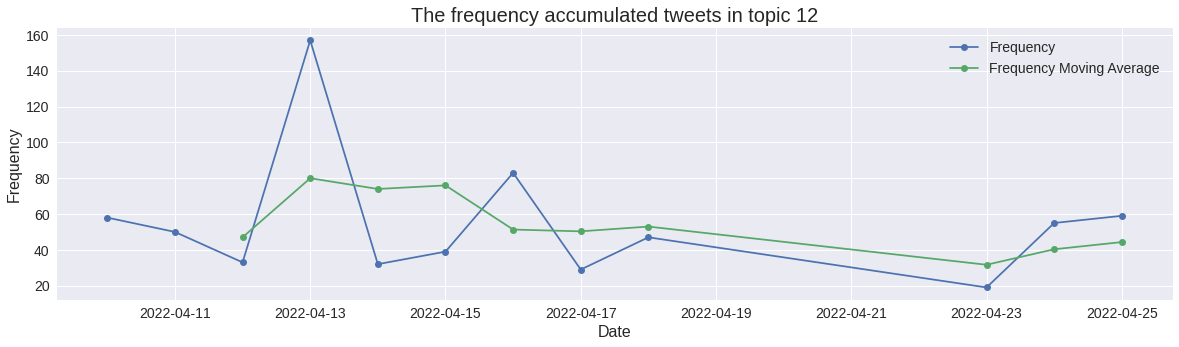

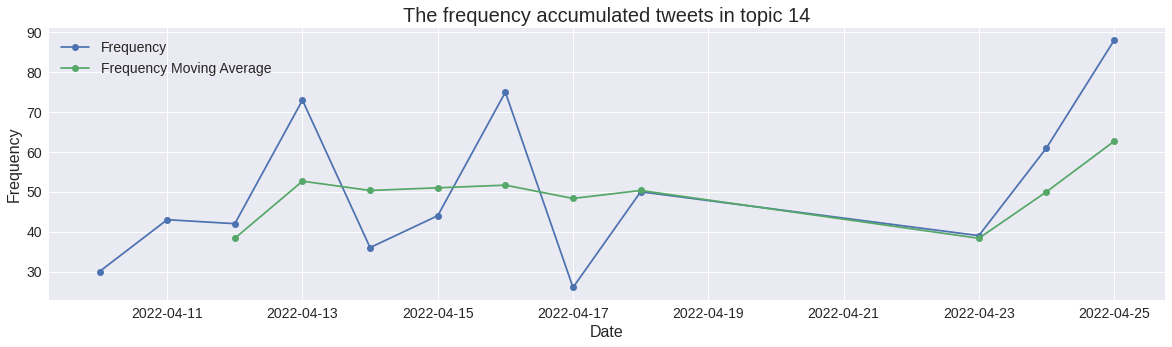

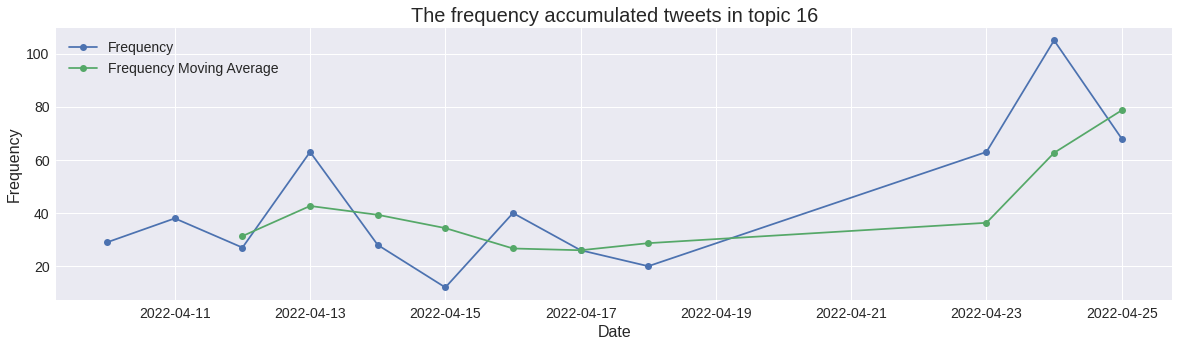

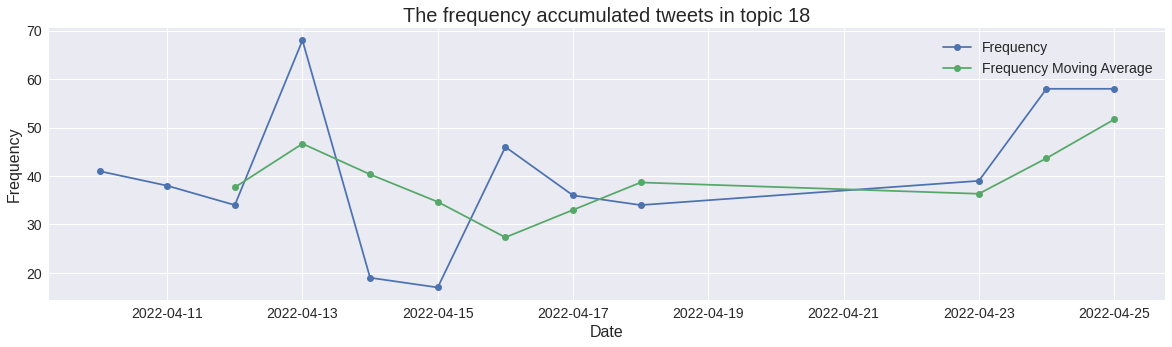

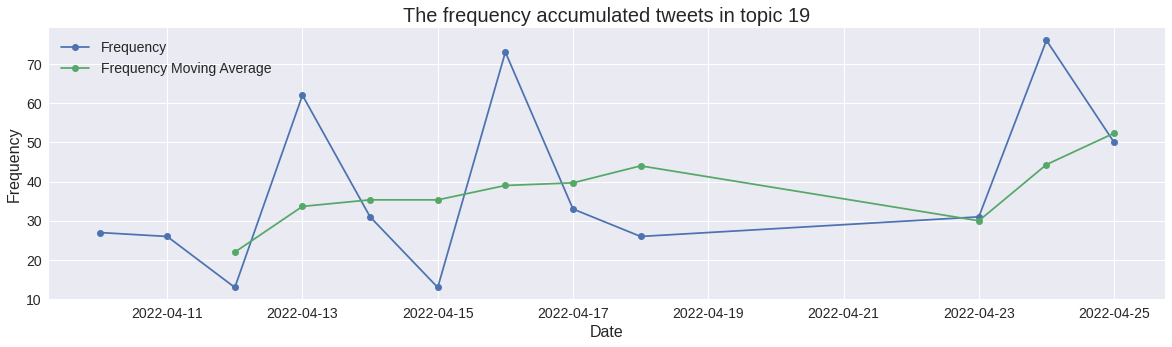

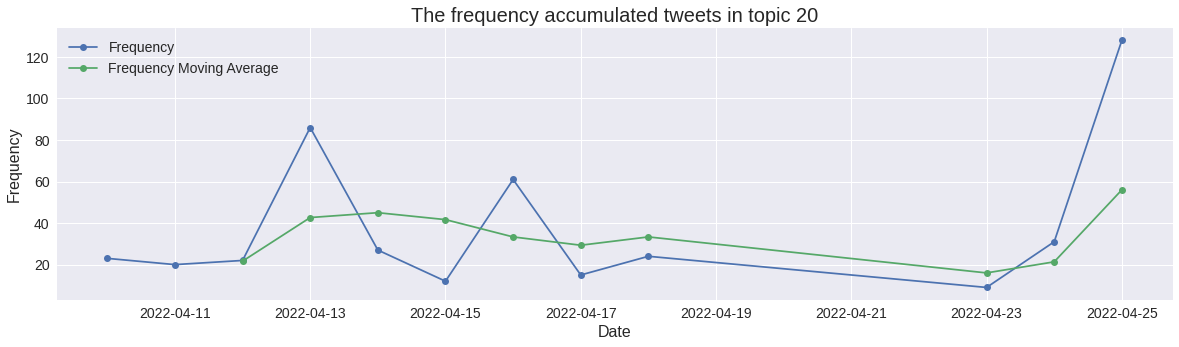

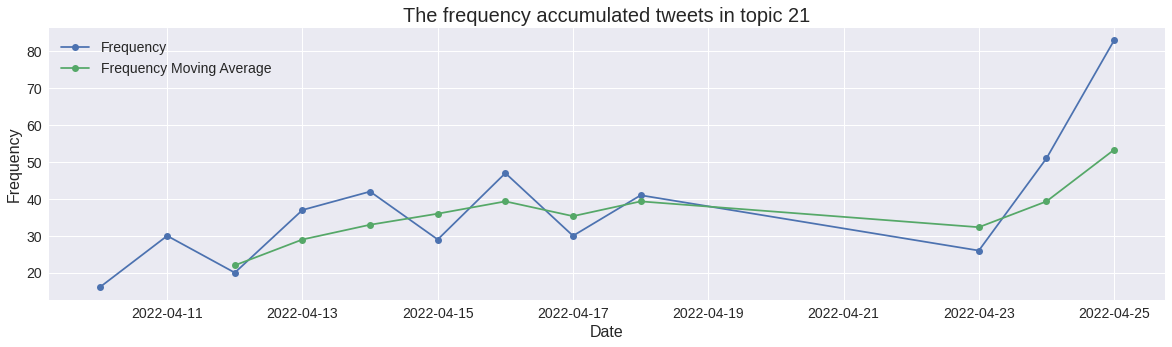

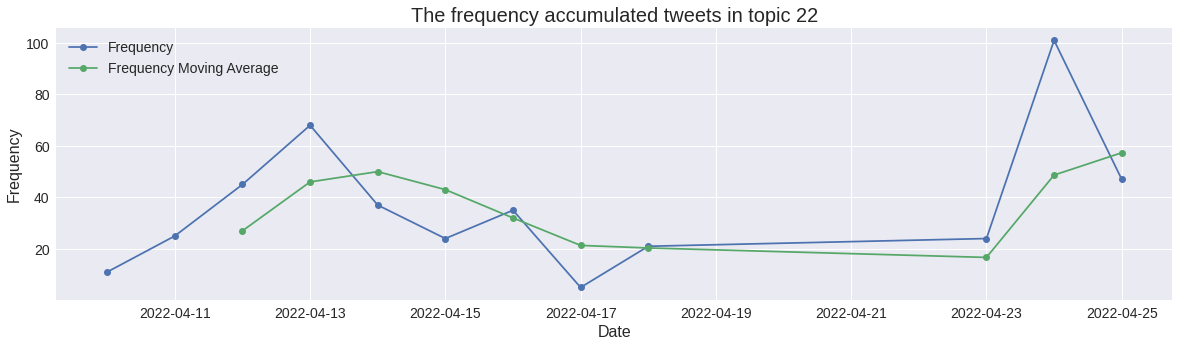

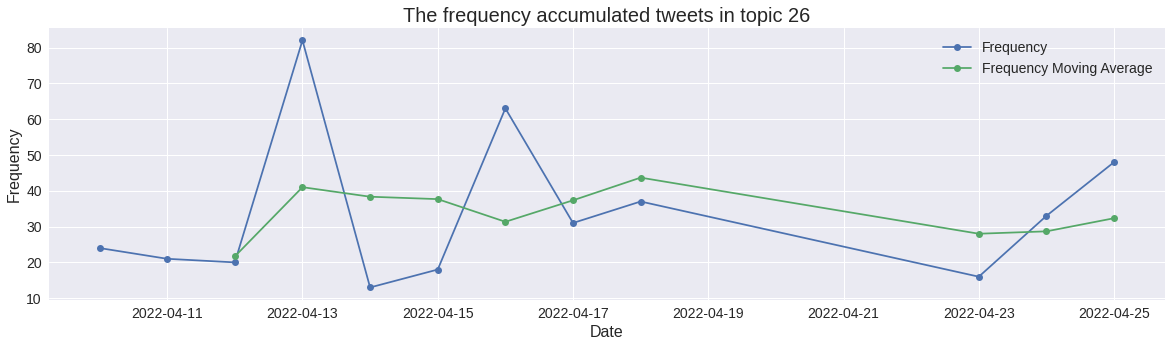

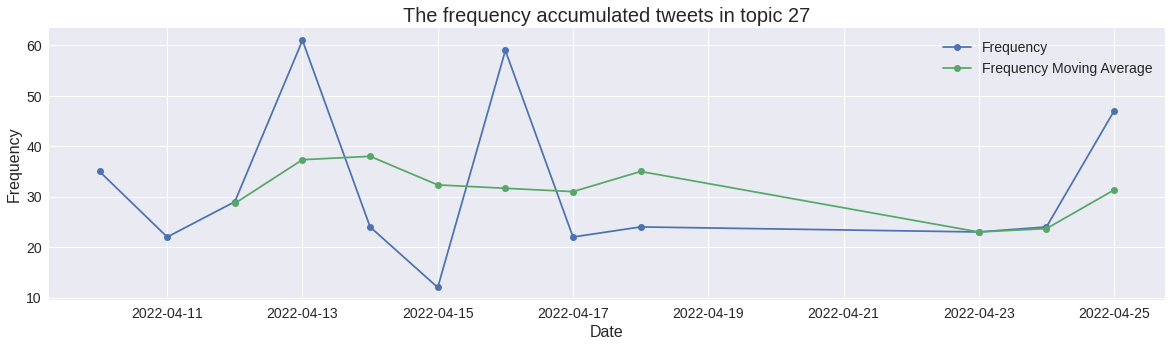

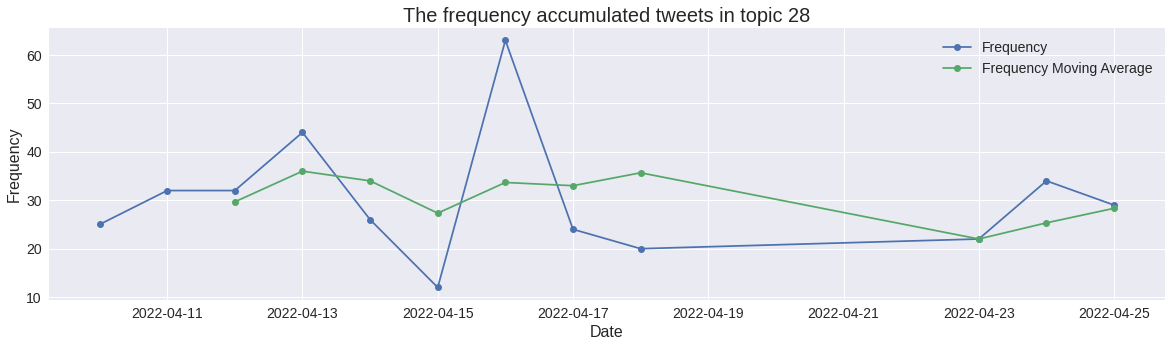

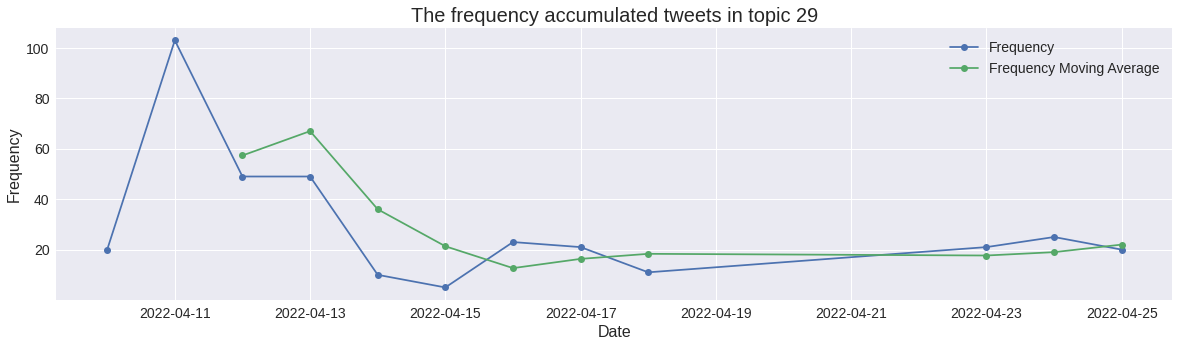

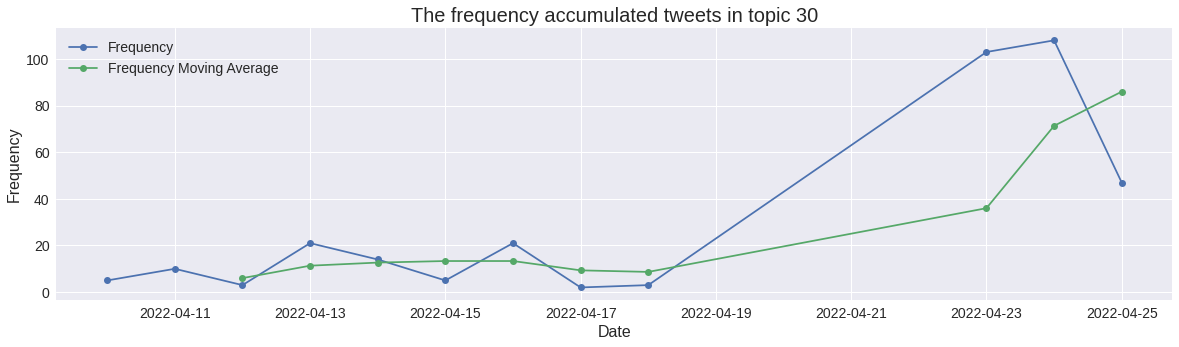

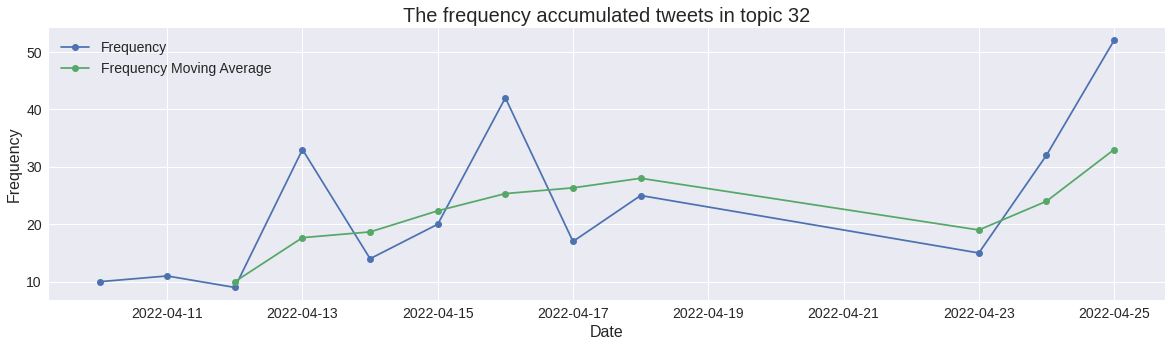

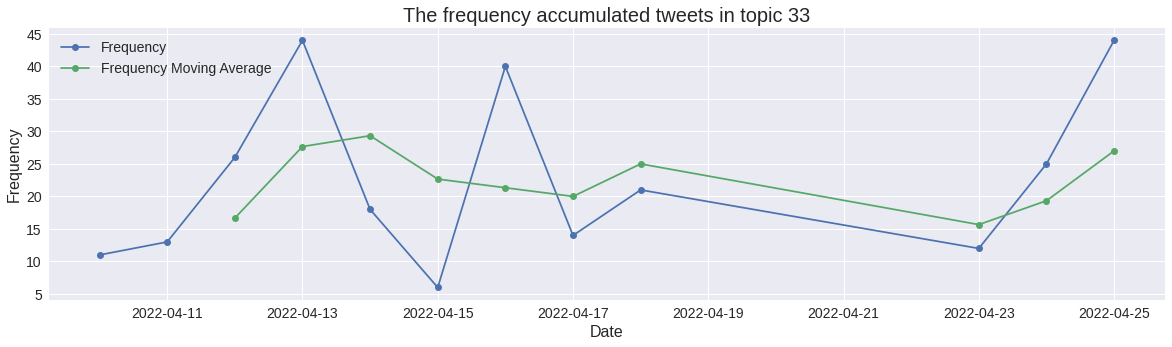

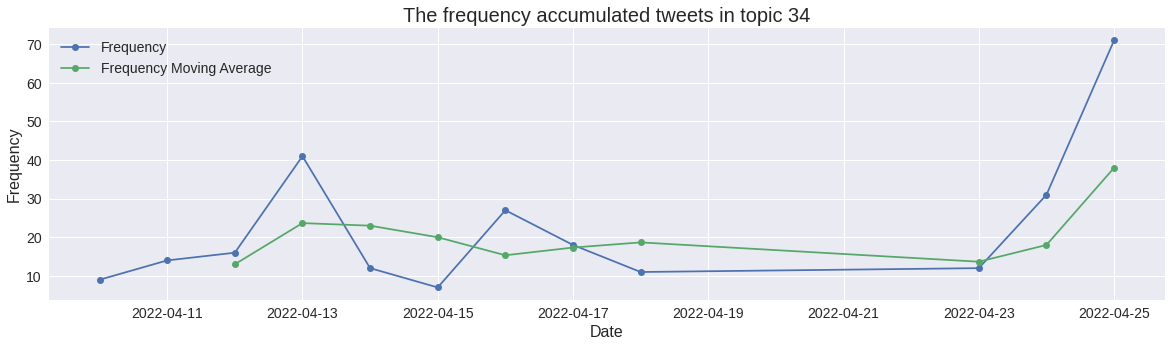

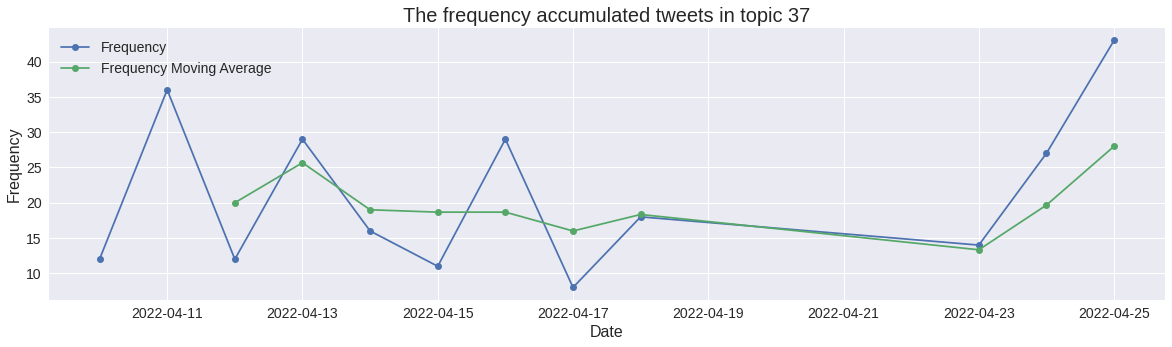

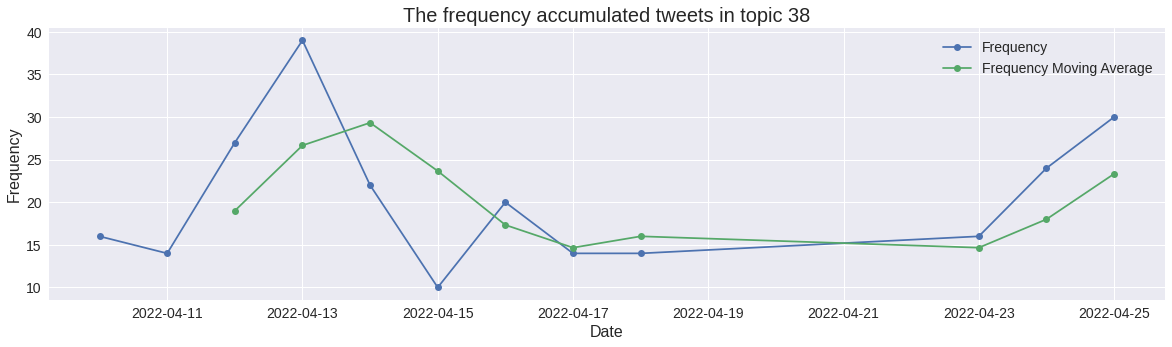

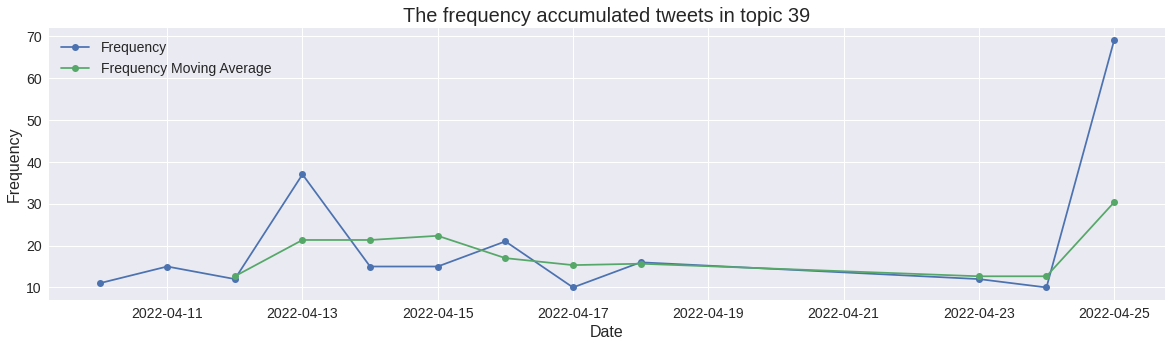

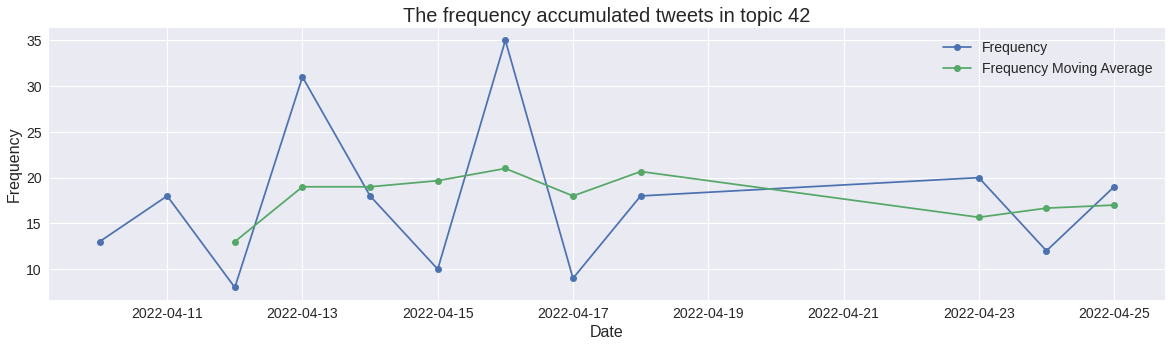

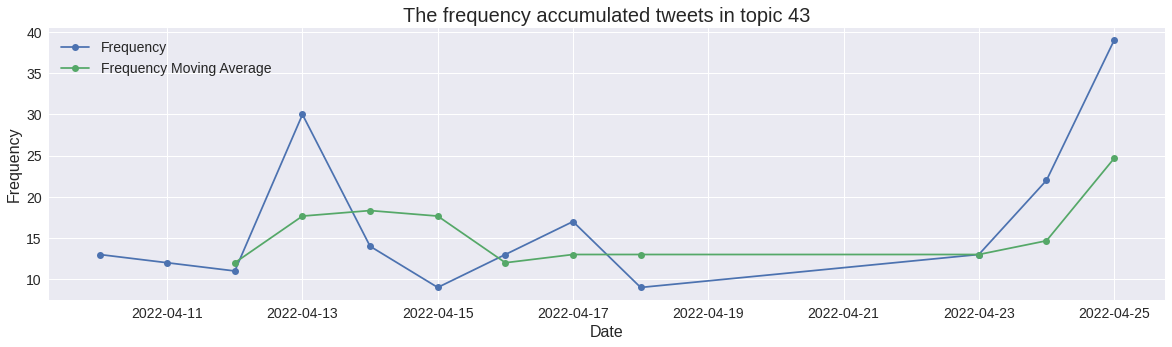

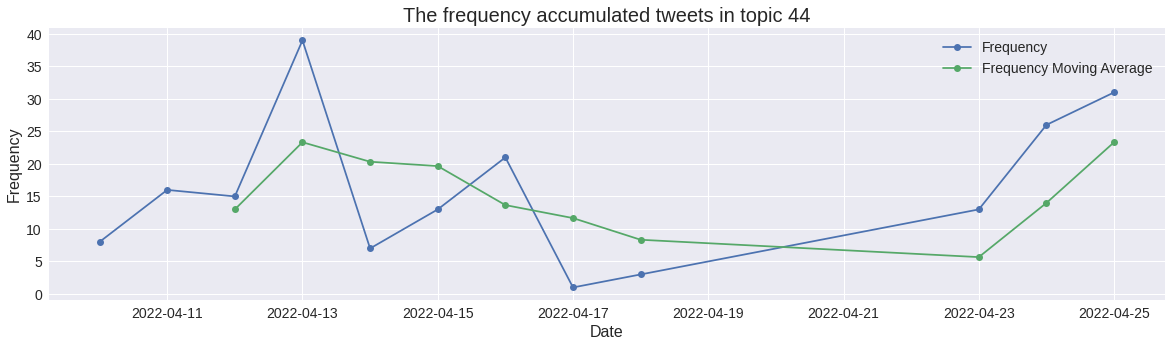

In [ ]:
# https://www.pythonpool.com/moving-average-python/

import matplotlib.pyplot as mp
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

def get_moving_averege(df)->list():
  trendy_topics = []
  for t in topics :
    df_for_topic_t = df[df['Topic'] == t]
    df_for_topic_t = df_for_topic_t.sort_values(by=['date'])
    df_for_topic_t = df_for_topic_t[["date","Frequency"]]
    df_for_topic_t.set_index('date', inplace=True)
    df_for_topic_t.index.name = 'date'
    if df_for_topic_t["Frequency"].rolling(window =3).mean().tail(3).is_monotonic_increasing:
      df_for_topic_t["Frequency"].plot(kind="line",marker='o', figsize=(10, 5))
      df_for_topic_t["Frequency"].rolling(window =3).mean().plot(kind="line",marker='o', figsize=(20, 5))

      # modify ticks size
      plt.xticks(fontsize=14)
      plt.yticks(fontsize=14)
      plt.legend(labels =['Frequency','Frequency Moving Average'], fontsize=14)

      # title and labels
      plt.title('The frequency accumulated tweets in topic '+str(t), fontsize=20)
      plt.xlabel('Date', fontsize=16)
      plt.ylabel('Frequency', fontsize=16)
      mp.show()

get_moving_averege(topic_sum)

## Trend detector function

In [ ]:
def trenddetector(list_of_index, array_of_data, order=1):
    result = np.polyfit(list_of_index, list(array_of_data), order)
    slope = result[-2]
    return float(slope)

## Linear regression to the moving average

In [ ]:
import numpy as np

trend_dict = {}
for t in topics :
  df_for_topic_t = topic_sum[topic_sum['Topic'] == t]
  df_for_topic_t = df_for_topic_t.sort_values(by=['date'])
  df_for_topic_t = df_for_topic_t[["date","Frequency"]]
  if df_for_topic_t["Frequency"].rolling(window =3).mean().tail(3).is_monotonic_increasing:
    moving_avg_freq = df_for_topic_t["Frequency"].rolling(window =3).mean()
    moving_avg_freq = moving_avg_freq.dropna()
    topic_score = trenddetector(np.array(range(len(moving_avg_freq))), np.array(moving_avg_freq))
    if topic_score > 0:
      trend_dict[t] = topic_score


sorted_trends = {k: v for k, v in sorted(trend_dict.items(), key=lambda item: -item[1])}
trend_df = pd.DataFrame(list(sorted_trends.items()),columns = ['Topic','Score'])
trend_df = trend_df[trend_df["Score"] > trend_df["Score"].median()]
trend_df


Topic     Score
0     30  7.507071
1      1  5.151515
2     16  3.232323
3     21  2.163636
4     19  2.107071
5     32  1.642424
6     34  0.828283

In [ ]:
topic_new = sorted_topics[sorted_topics['Topic'] == 34]
topic_new = topic_new.sort_values(by=['Timestamp'])
topic_new

Topic                                              Words  Frequency  \
35      34  לשם כבוד, נראה שחללית, טייס לשם, כבוד ותהילה ל...          9   
83      34  ב55 מיליון, לטוס לחלל, שלהם מעדיף, באימירטס יה...         14   
132     34  על ניסה להמריא, להמריא פעמיים ולא, על ניסה, לח...         16   
181     34  צריכות להתעסק בזה, ממשלות צריכות להתעסק, סוציא...         16   
230     34  לחסוך בהוצאות, מנכל נתבג שמואל, נתבג שמואל זכא...         25   
279     34  לא מבין, אלפים שיעידו, הילדים הבא בתור, משתמשי...         12   
328     34  מקהיר ברור, בנתבג בטיסה ישירה, שתאחסן ולבנות, ...          7   
377     34  חיל האוויר, במילה אחת טרולי, יטוסו ואם, שישן כ...         12   
425     34  חיל האוויר, עוד גדול, אלף איש, משהו שתלך דרכו,...         15   
474     34  במטס יום העצמאות, במטס יום, האמירויות ישתתפו ב...         18   
523     34  האווירי לטיסות, המרחב האווירי, לאירופה ואמריקה...         11   
571     34  חיל האוויר, עיר האבות חברון, האבות חברון, עיר ...         12   
620     34  חיל האוויר, מתן כהנא, יום העצמאות, להודיע נחרצ...         31   
667     34  מתן כהנא, חיל האוויר, טייס וגם, גם טייס וגם, ג...         71   

                  Timestamp        date  
35  2022-04-10 20:38:19.004  2022-04-10  
83  2022-04-11 14:59:54.800  2022-04-11  
132 2022-04-12 08:59:54.600  2022-04-12  
181 2022-04-13 02:59:54.400  2022-04-13  
230 2022-04-13 20:59:54.200  2022-04-13  
279 2022-04-14 14:59:54.000  2022-04-14  
328 2022-04-15 08:59:53.800  2022-04-15  
377 2022-04-16 02:59:53.600  2022-04-16  
425 2022-04-16 20:59:53.400  2022-04-16  
474 2022-04-17 14:59:53.200  2022-04-17  
523 2022-04-18 08:59:53.000  2022-04-18  
571 2022-04-23 14:59:51.600  2022-04-23  
620 2022-04-24 08:59:51.400  2022-04-24  
667 2022-04-25 02:59:51.200  2022-04-25

## Linear regression to topic frequency over time(without moving average)

In [ ]:
import numpy as np

trend_dict = {}
for t in topics :
  df_for_topic_t = topic_sum[topic_sum['Topic'] == t]
  df_for_topic_t = df_for_topic_t.sort_values(by=['date'])
  df_for_topic_t = df_for_topic_t[["date","Frequency"]]
  if df_for_topic_t["Frequency"].rolling(window =3).mean().tail(3).is_monotonic_increasing:
    topic_score = trenddetector(np.array(range(len(df_for_topic_t["Frequency"]))), np.array(df_for_topic_t["Frequency"]))
    if topic_score > 0:
      trend_dict[t] = topic_score


sorted_trends = {k: v for k, v in sorted(trend_dict.items(), key=lambda item: -item[1])}
trend_df = pd.DataFrame(list(sorted_trends.items()),columns = ['Topic','Score'])
trend_df = trend_df[trend_df["Score"] > trend_df["Score"].median()]
trend_df

Topic     Score
0       1  9.625874
1      30  6.762238
2       4  4.601399
3      16  3.814685
4      21  3.391608
5      20  3.027972
6       9  2.814685
7      19  2.500000
8      34  2.430070
9      32  2.391608
10     14  2.325175

In [ ]:
topic_new = sorted_topics[sorted_topics['Topic'] == 20]
topic_new = topic_new.sort_values(by=['Timestamp'])
topic_new

Topic                                              Words  Frequency  \
21      20  הטוויטר כת, לחלום שעל, שאני לסבול בכל, מבין וש...         23   
69      20  בתמיכה וניהול, וניהול מתנדבות, הפייק יוזר, בתמ...         20   
118     20  לנהל עמוד, לנהל עמוד הטוויטר, עמוד הטוויטר, זה...         22   
167     20  פנויים פנויות, גרושות פנויים, גרושות פנויים פנ...         32   
216     20  אלון מאסק, לקנות טוויטר, לרכוש כל, אילון מאסק,...         54   
265     20  אילון מאסק, לקנות טוויטר, לפי שער, יקנה טוויטר...         27   
314     20  כותב פוסטים שמאליים, פרטי ואולי לראות, בשבוע ה...         12   
363     20  לייקים בטוויטר, חברה קטנה, דולר בשנה, תודה תוד...         25   
411     20  האיסור השימוש ברשת, ממשלת אינדונזיה הוציאה, תכ...         36   
460     20  ועל מדרכת המאהל, לייקים וגם אחרי, טובים אחכ, ל...         15   
509     20  אפקט רשת, בטוויטר ולא, ובנוסף העם הנבחר, טרור ...         24   
557     20  מתחילה את עוברת, ושם הקודים, שאת מתחילה את, לך...          9   
606     20  אילון מאסק, בפייסבוק אני ביבי, בפייסבוק אני, א...         31   
653     20  אילון מאסק, אלון מאסק, מיליארד דולר, מאסק רכש,...        128   

                  Timestamp        date  
21  2022-04-10 20:38:19.004  2022-04-10  
69  2022-04-11 14:59:54.800  2022-04-11  
118 2022-04-12 08:59:54.600  2022-04-12  
167 2022-04-13 02:59:54.400  2022-04-13  
216 2022-04-13 20:59:54.200  2022-04-13  
265 2022-04-14 14:59:54.000  2022-04-14  
314 2022-04-15 08:59:53.800  2022-04-15  
363 2022-04-16 02:59:53.600  2022-04-16  
411 2022-04-16 20:59:53.400  2022-04-16  
460 2022-04-17 14:59:53.200  2022-04-17  
509 2022-04-18 08:59:53.000  2022-04-18  
557 2022-04-23 14:59:51.600  2022-04-23  
606 2022-04-24 08:59:51.400  2022-04-24  
653 2022-04-25 02:59:51.200  2022-04-25